### Reacher-v2 Environment with CNN

### Image of one state

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
env = gym.make('Reacher-v101')
state = env.reset()
print("State:",state.shape)

Creating offscreen glfw
State: (256, 256, 3)


### Save image with Matplotlib

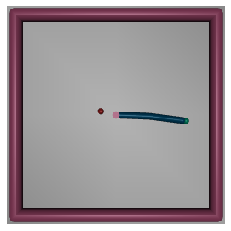

In [8]:
%matplotlib inline

# Save the image without margin
# def save_image(data, cm, fn):
   
#     sizes = np.shape(data)
#     height = float(sizes[0])
#     width = float(sizes[1])
     
#     fig = plt.figure()
#     fig.set_size_inches(width/height, 1, forward=False)
#     ax = plt.Axes(fig, [0., 0., 1., 1.])
#     ax.set_axis_off()
#     fig.add_axes(ax)
 
#     ax.imshow(data, cmap=cm)
#     plt.savefig(fn, dpi = height) 
#     plt.close()

# save_image(state, None, 'test_mat_no_marg.png')

# Save the image with margin
plt.axis('off')
plt.imshow(state)
plt.savefig('/Users/chingandywu/pic/test_mat.png',transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()


### Save image with cv2

In [2]:
state = state.astype('uint8')
cv2.imwrite('test_cv2_clr.png', cv2.cvtColor(state, cv2.COLOR_RGB2BGR))
cv2.imwrite('test_cv2.png', state)

True

In [3]:
#########################################################
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 256

# Filter by Area
params.filterByArea = True
params.maxArea = 700
params.minArea = 50

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia = True
params.maxInertiaRatio = 10
params.minInertiaRatio = 0.01

# Filter by Color
params.filterByColor = False
#########################################################################

### Show state directly

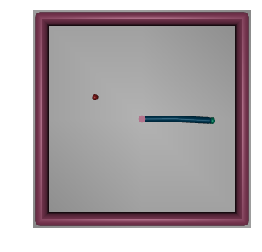

state:  (256, 256, 3) <class 'numpy.ndarray'>
Keypoints:  [<KeyPoint 0x12265e420>]
(72.5257339477539, 102.09203338623047)


In [4]:
im = state

# scale_percent = 100 # percent of original size
# width = int(im.shape[1] * scale_percent / 100)
# height = int(im.shape[0] * scale_percent / 100)
# dim = (width, height)
# resize image
# im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
# im = cv2.normalize(im,  None, 0, 255, cv2.NORM_MINMAX)
%matplotlib inline
plt.axis('off')
plt.imshow(im)
plt.show()
detector = cv2.SimpleBlobDetector_create()
print("state: ", im.shape, type(im))
keypoints = detector.detect(im)
print("Keypoints: ", keypoints)
if keypoints:
    print(keypoints[0].pt)

### Read image by cv2 (test_mat.png)

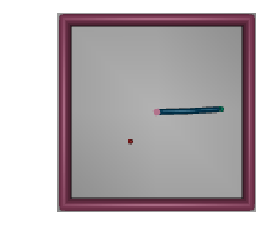

im_cv2:  (237, 243, 3) <class 'numpy.ndarray'>
Max:  255
Min:  0
Keypoints:  [<KeyPoint 0x1083b4510>]
(105.68199157714844, 142.40805053710938)


In [25]:
# im_cv2 = state
# im_cv2[120:127,:,0] = [255]*128
# im_cv2[120:127,:,1] = [255]*128
# im_cv2[120:127,:,2] = [255]*128

# im_cv2 = cv2.imread("test_cv2.png")
# im_cv2 = cv2.cvtColor(im_cv2, cv2.COLOR_BGR2RGB, 1);
im_cv2 = cv2.imread("test_mat.png")
im_cv2 = cv2.cvtColor(im_cv2, cv2.COLOR_BGR2RGB, 1);
%matplotlib inline
plt.axis('off')
plt.imshow(im_cv2)
plt.show()
detector = cv2.SimpleBlobDetector_create()
print("im_cv2: ", im_cv2.shape, type(im_cv2))
print("Max: ", im_cv2.max())
print("Min: ", im_cv2.min())
keypoints = detector.detect(im_cv2)
print("Keypoints: ", keypoints)
if keypoints:
    print(keypoints[0].pt)

### Read image by cv2 (test_mat_no_marg.png)

Max:  178
Max:  178


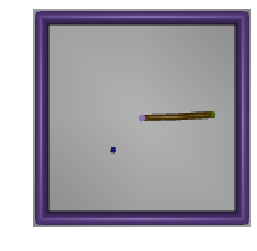

im_cv2:  (128, 128, 3) <class 'numpy.ndarray'>
Max:  178
Min:  0
Keypoints:  []


In [39]:
im_cv2 = cv2.imread("test_mat_no_marg.png")
# im_cv2 = cv2.cvtColor(im_cv2, cv2.COLOR_BGR2RGB, 1);
def rescale_img(arr):
    return (arr - arr.min()) * (1/(arr.max() - arr.min()) * 255).astype('uint8')
print("Max: ", im_cv2.max())
im_cv2 = rescale_img(im_cv2)
print("Max: ", im_cv2.max())
%matplotlib inline
plt.axis('off')
plt.imshow(im_cv2)
plt.show()
detector = cv2.SimpleBlobDetector_create()
print("im_cv2: ", im_cv2.shape, type(im_cv2))
print("Max: ", im_cv2.max())
print("Min: ", im_cv2.min())
keypoints = detector.detect(im_cv2)
print("Keypoints: ", keypoints)
if keypoints:
    print(keypoints[0].pt)

In [35]:
x = np.array([[1,2,3], [2,3,4]])
y = np.array([[1,2,3],[2, 3, 4]])
np.array_equal(x, y)
print(x.shape)
# np.array_equal(state, im_cv2)

(2, 3)


### Read image by matplotlib

In [24]:
import numpy as np
im_mat = plt.imread("test_mat.png")
print("im_mat: ", im_mat.shape, type(im_mat))
# im_mat = np.delete(im_mat, 3, axis=2)
# print("im_mat: ", im_mat.shape, type(im_mat))

im_mat = cv2.cvtColor(im_mat, cv2.COLOR_RGB2GRAY, 1);
im_mat = cv2.cvtColor(im_mat, cv2.COLOR_GRAY2RGBA, 1);

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im_mat)
print("Keypoints: ", keypoints)
if keypoints:
    print(keypoints[0].pt)

im_mat:  (128, 128, 4) <class 'numpy.ndarray'>


error: OpenCV(3.4.5) /Users/travis/build/skvark/opencv-python/opencv/modules/features2d/src/blobdetector.cpp:322: error: (-210:Unsupported format or combination of formats) Blob detector only supports 8-bit images! in function 'detect'


### See the difference of using different functions to read in the same image

In [144]:
im_1 = cv2.imread("test_mat.png")
print(type(im_1[:,:,1][0][0]))
im_2 = plt.imread("test_mat.png")
print(type(im_2[:,:,1][0][0]))

<class 'numpy.uint8'>
<class 'numpy.float32'>


In [145]:
im_1 = cv2.imread("test_mat.png")
print(type(im_1[:,:,1][0][0]))
im_2 = cv2.imread("test_cv2.png")
print(type(im_2[:,:,1][0][0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [30]:
print(state.shape)
print(state[:,:,1])

(128, 128, 3)
[[158 158 158 ... 137 137 137]
 [158 158 120 ... 109 137 137]
 [158 124  44 ...  44 105 137]
 ...
 [137 105  44 ...  44 124 158]
 [137 137 109 ... 120 158 158]
 [137 137 137 ... 158 158 158]]


In [30]:
x = np.array([[1,2,3],[4,5,6]])
x = np.vstack([x, [0,0,0]])
print(x)

[[1 2 3]
 [4 5 6]
 [0 0 0]]
